<a href="https://colab.research.google.com/github/SushmithaManjunath/Advanced-Operating-system-projects/blob/master/TitanicExploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Survival Prediction**



Sushmitha Manjunatha

In [0]:
# data process
import numpy as np 
import pandas as pd

In [0]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 
%matplotlib inline

In [0]:
# modeling
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier

# system
import os
import sys

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


![alt text](https://)Data loading and initial checking

In [0]:


# read data into pandas' data frame
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# make a deep copy to keep original data
train_deef = train_raw.copy(deep = True)
test_deef = test_raw.copy(deep = True)
combine = [train_deef, test_deef]

In [0]:
train_deef.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [0]:
test_deef.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,3,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,4,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,3,4,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,3,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,4,1,1


Data Cleaning and Exploration

In [0]:
print('Train columns with null values:\n', train_deef.isnull().sum())
print('Test/Validation columns with null values:\n', test_deef.isnull().sum())


Train columns with null values:
 PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64
Test/Validation columns with null values:
 PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: i

*complete* missing values in train and test dataset

> Indented block




In [0]:
for dataset in combine:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)


In [0]:
# create features for modeling
for dataset in combine:    

    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


In [0]:
main_titles = (train_deef['Title'].append(test_deef['Title']).value_counts() >10)
for dataset in combine:
    dataset['Title'] = dataset['Title'].apply(lambda x: x if main_titles.loc[x] == True else 'Misc')
train_deef['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [0]:
# convert objects to category
label = LabelEncoder()
for dataset in combine:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


In [0]:
train_deef.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title', 'FareBin', 'AgeBin', 'Sex_Code', 'Embarked_Code', 'Title_Code',
       'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [0]:
# check surviving rate for dimensions
Target = ['Survived']
columns_to_check = ['Sex','Pclass', 'Embarked', 'Title', 'FamilySize', 'IsAlone']
for x in columns_to_check:
    print('Survival Correlation by:', x)
    #print(train_deef[[x, Target[0]]].groupby(x, as_index=False).mean())
    print(train_deef[[x, Target[0]]].groupby(x, as_index=False).agg(['count', 'mean']))
    print('-'*10, '\n')


Survival Correlation by: Sex
       Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908
---------- 

Survival Correlation by: Pclass
       Survived          
          count      mean
Pclass                   
1           216  0.629630
2           184  0.472826
3           491  0.242363
---------- 

Survival Correlation by: Embarked
         Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             646  0.339009
---------- 

Survival Correlation by: Title
       Survived          
          count      mean
Title                    
Master       40  0.575000
Misc         27  0.444444
Miss        182  0.697802
Mr          517  0.156673
Mrs         125  0.792000
---------- 

Survival Correlation by: FamilySize
           Survived          
              count      mean
FamilySize                   
1               537  0.303538
2   

In [0]:
# select features for modeling
data_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data_xy_bin = Target + data_x_bin

data = train_deef[data_xy_bin]
X = train_deef[data_x_bin]
y = train_deef[Target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_pred = test_deef[data_x_bin]

In [0]:
# select features for modeling
data_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data_xy_bin = Target + data_x_bin

data = train_deef[data_xy_bin]
X = train_deef[data_x_bin]
y = train_deef[Target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_pred = test_deef[data_x_bin]

In [0]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
acc_train_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_test_svc = round(svc.score(X_test, y_test) * 100, 2)
print('Support Vector Machine train accurary: ',acc_train_svc)
print('Support Vector Machine test accurary: ',acc_test_svc)

# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
acc_train_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
print('K-Nearest Neighbors train accurary: ',acc_train_knn)
print('K-Nearest Neighbors test accurary: ',acc_test_knn)

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_train_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print('Decision Tree train accurary: ',acc_train_decision_tree)
print('Decision Tree test accurary: ',acc_test_decision_tree)

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Y_pred = random_forest.predict(X_test)
acc_train_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest train accurary: ',acc_train_random_forest)
print('Random Forest test accurary: ',acc_test_random_forest)


Support Vector Machine train accurary:  83.83
Support Vector Machine test accurary:  81.61
K-Nearest Neighbors train accurary:  79.79
K-Nearest Neighbors test accurary:  75.34
Decision Tree train accurary:  88.92
Decision Tree test accurary:  82.51
Random Forest train accurary:  88.92
Random Forest test accurary:  83.86


In [0]:
# Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    
    ensemble.RandomForestClassifier(),

   
    
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
   
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
   
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_deef[data_x_bin], train_deef[Target],cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions
    alg.fit(train_deef[data_x_bin], train_deef[Target])
    MLA_predict[MLA_name] = alg.predict(train_deef[data_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
2,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0482754
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.890262,0.820522,0.0769788,0.0135358
3,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.820149,0.0474394,0.00251684
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00258842


Tuned model with hyper parameters

In [0]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, train_deef[data_x_bin], train_deef[Target], cv  = cv_split)
dtree.fit(train_deef[data_x_bin], train_deef[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))


BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09


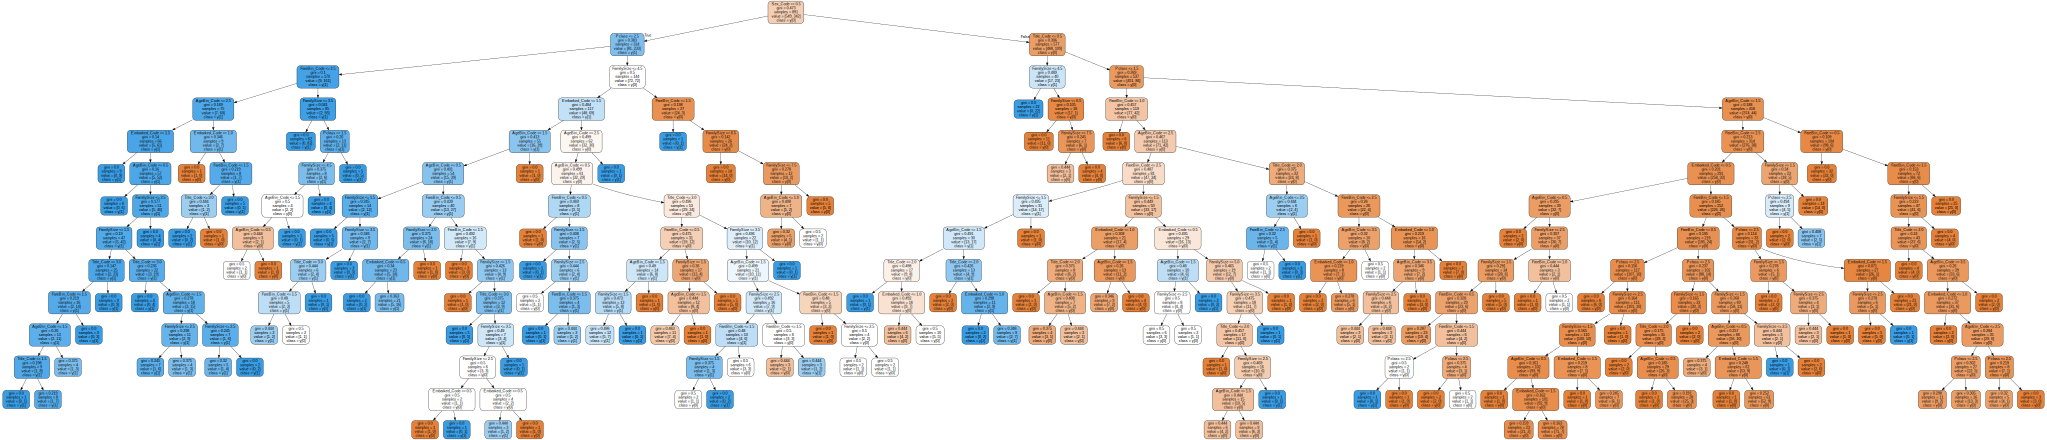

In [0]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00
----------


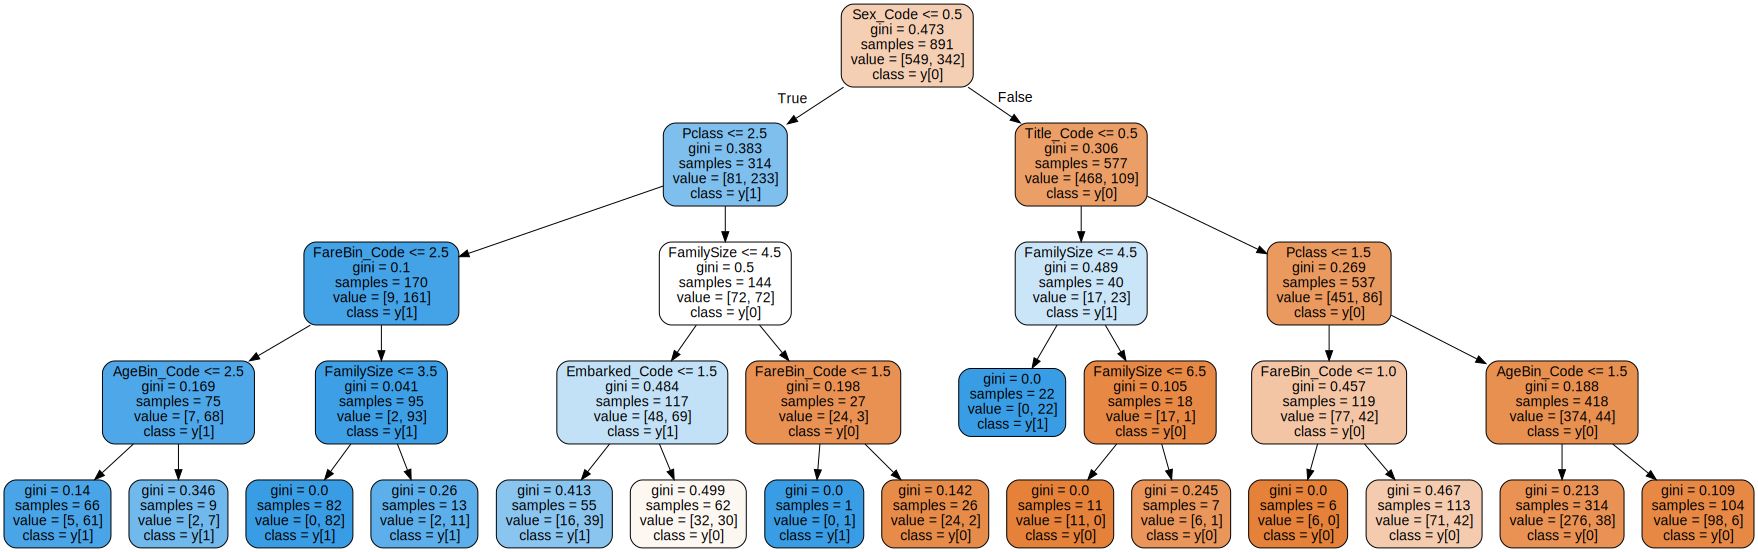

In [0]:
#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
            
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
             
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(train_deef[data_x_bin], train_deef[Target])


print('AFTER DT Parameters: ', tune_model.best_params_)

print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 

print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state = 0)
dtree.fit(train_deef[data_x_bin], train_deef[Target])
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

## **Final Lable predict**

In [0]:
Y_pred = dtree.predict(X_pred)

# get result file
submission_tree = pd.DataFrame({
        "PassengerId": test_deef['PassengerId'],
        "Survived": Y_pred
    })

print(submission_tree.head())
print(submission_tree)

#save the submission file
#submission_tree.to_csv('submission_tree_turned.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           